In [1]:
import BigKindsParser as bkp

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

import warnings
warnings.filterwarnings("ignore")

import konlpy
okt = konlpy.tag.Okt()

plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams['figure.figsize'] = 10,10
sns.set(font="Malgun Gothic", rc={"axes.unicode_minus":False}, style='white')

In [2]:
news_df = pd.read_excel("./inha_3month.xlsx", engine = 'openpyxl')

## 언론사 확인

In [3]:
press = bkp.press_counter(news_df)

<AxesSubplot: xlabel='기사', ylabel='언론사'>

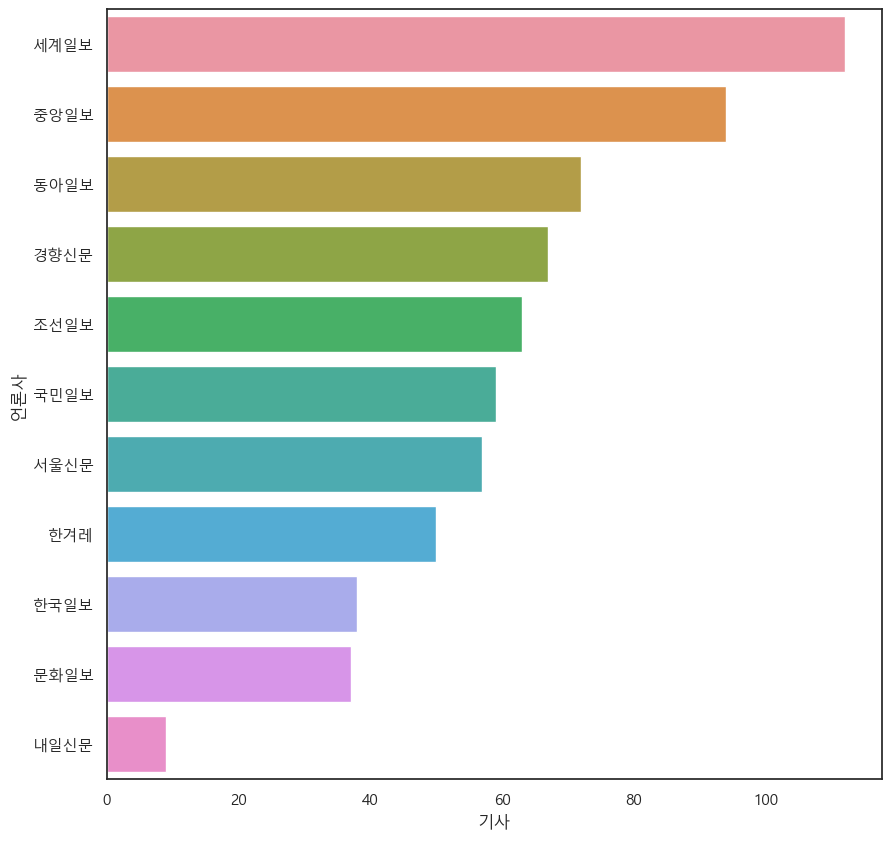

In [4]:
sns.barplot(data = press, x = "기사", y = "언론사")

## 키워드 빈도

In [5]:
lis = bkp.keywords_list(news_df["키워드"])

In [6]:
key = bkp.keyword_parser(lis)

In [7]:
key = bkp.duplication_remover(key)

In [8]:
key_words = bkp.word_counter(key)
key_words = bkp.counter_to_DataFrame(key_words)

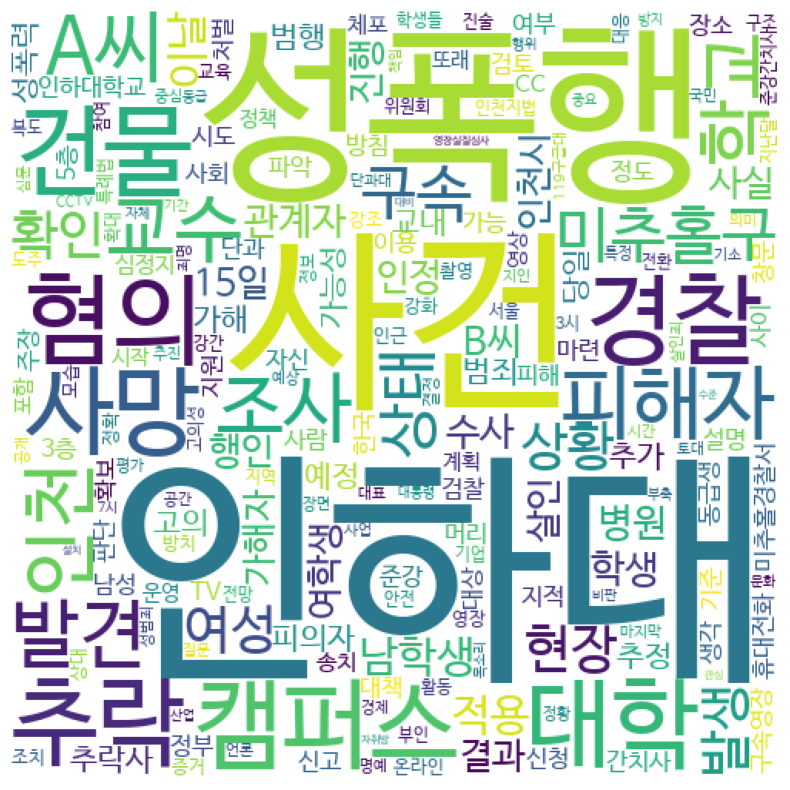

In [9]:
wc = WordCloud(font_path = './NanumBarunGothic.ttf',
    width = 500,
    height = 500,
    background_color='white').generate_from_frequencies(key_words.set_index('단어').to_dict()["빈도"])


plt.figure(figsize = (10, 10))
plt.imshow(wc)
plt.axis('off')
plt.show()

## 언론사 별 단어 빈도 분석

In [10]:
news_df['언론사'].unique()

array(['조선일보', '국민일보', '중앙일보', '한겨레', '서울신문', '내일신문', '경향신문', '문화일보',
       '동아일보', '세계일보', '한국일보'], dtype=object)

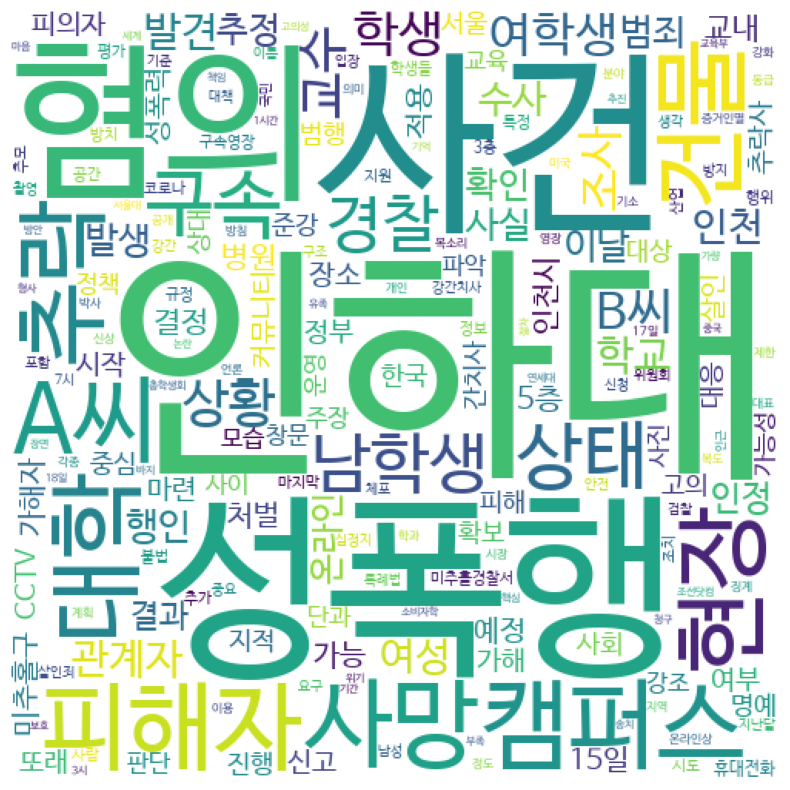

In [11]:
bkp.press_keywords_wordcloud(news_df, '조선일보')

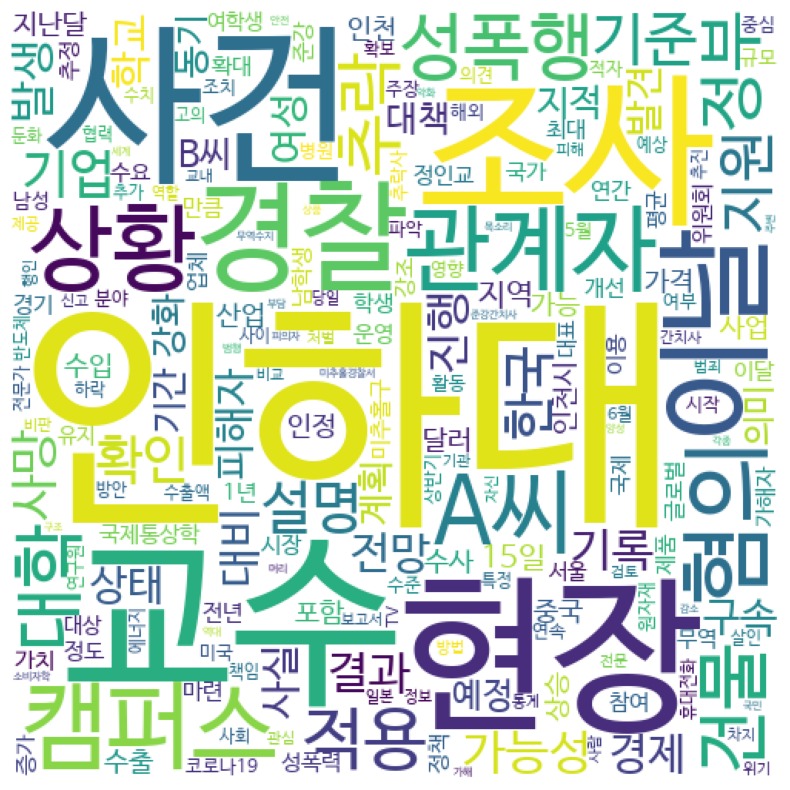

In [12]:
bkp.press_keywords_wordcloud(news_df, '중앙일보')

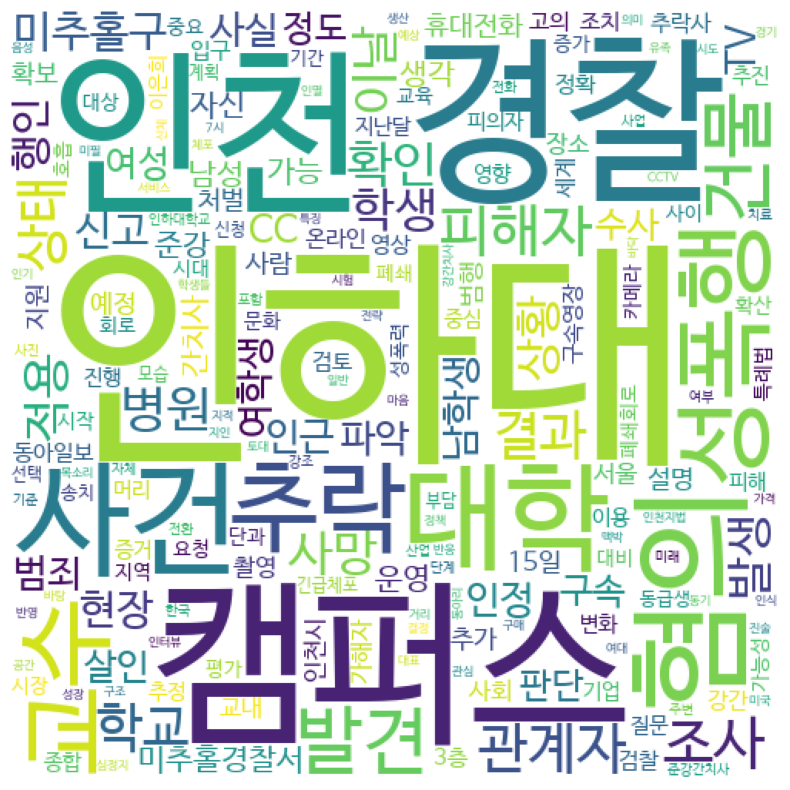

In [13]:
bkp.press_keywords_wordcloud(news_df, '동아일보')

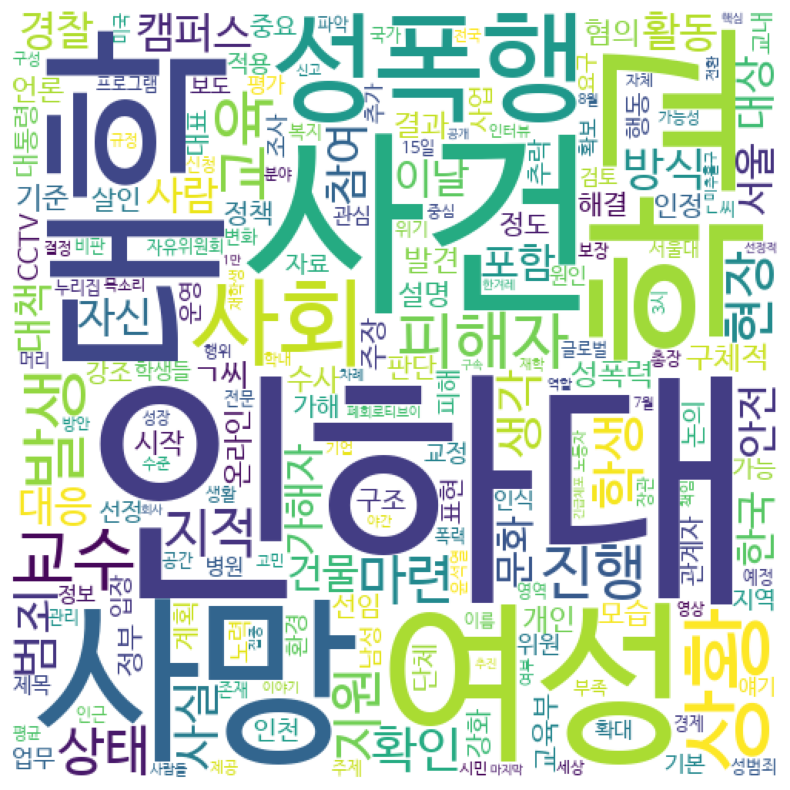

In [14]:
bkp.press_keywords_wordcloud(news_df, '한겨레')

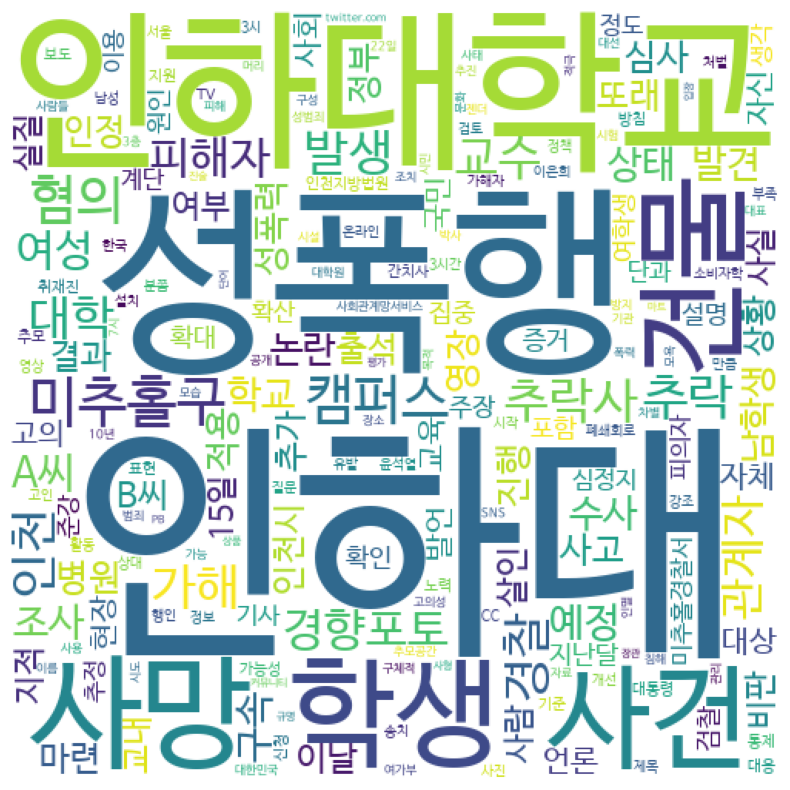

In [15]:
bkp.press_keywords_wordcloud(news_df, '경향신문')

## 제목 단어 빈도 분석

In [16]:
title = bkp.keywords_list(news_df['제목'])

In [17]:
words = []
for i in range(len(title)):
    word = okt.nouns(title[i])
    words.append(word)

In [18]:
news_titles = bkp.word_counter(words)
news_titles = bkp.counter_to_DataFrame(news_titles)

In [19]:
news_titles= news_titles[news_titles["단어"].str.len() >=2].reset_index(drop = True)

In [20]:
news_titles = news_titles.head(20)

<AxesSubplot: xlabel='빈도', ylabel='단어'>

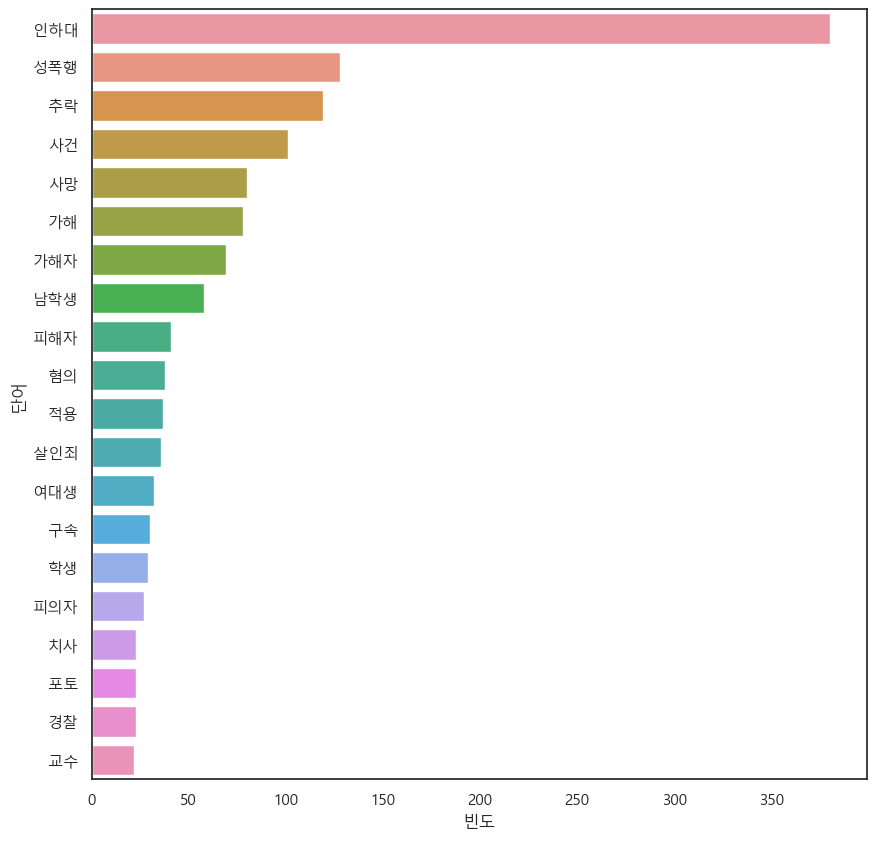

In [21]:
sns.barplot(data = news_titles, x = '빈도', y = '단어')

## 키워드 분석 with Bigram

In [22]:
from nltk import bigrams

In [23]:
wor = []

for sentence in key:
    bigram = bigrams(sentence)
    for t in bigram:
        if t[0]== '성폭행':
            wor.append(t[1])
        elif t[1] == '성폭행':
            wor.append(t[0])

In [24]:
counter = {}

for word in wor:
    if not word in counter:
        counter[word] = 1
    elif word in counter:
        counter[word] +=1

In [25]:
vio_df = bkp.counter_to_DataFrame(counter)
vio_df = vio_df[vio_df['단어'].str.len() >= 2].reset_index(drop = True).head(30)

<AxesSubplot: xlabel='빈도', ylabel='단어'>

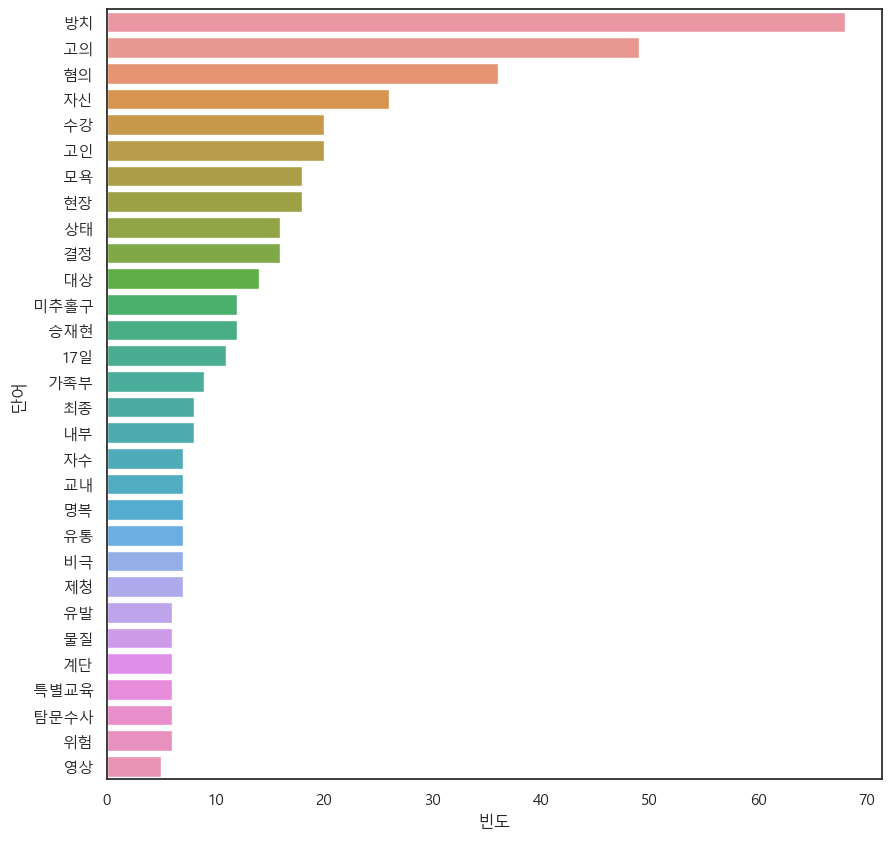

In [26]:
sns.barplot(data = vio_df, x = '빈도', y = '단어')

In [27]:
wor = []

for sentence in key:
    bigram = bigrams(sentence)
    for t in bigram:
        if t[0]== '여대생':
            wor.append(t[1])
        elif t[1] == '여대생':
            wor.append(t[0])

In [28]:
counter = {}

for word in wor:
    if not word in counter:
        counter[word] = 1
    elif word in counter:
        counter[word] +=1

In [29]:
vio_df = bkp.counter_to_DataFrame(counter)
vio_df = vio_df[vio_df['단어'].str.len() >= 2].reset_index(drop = True).head(30)

<AxesSubplot: xlabel='빈도', ylabel='단어'>

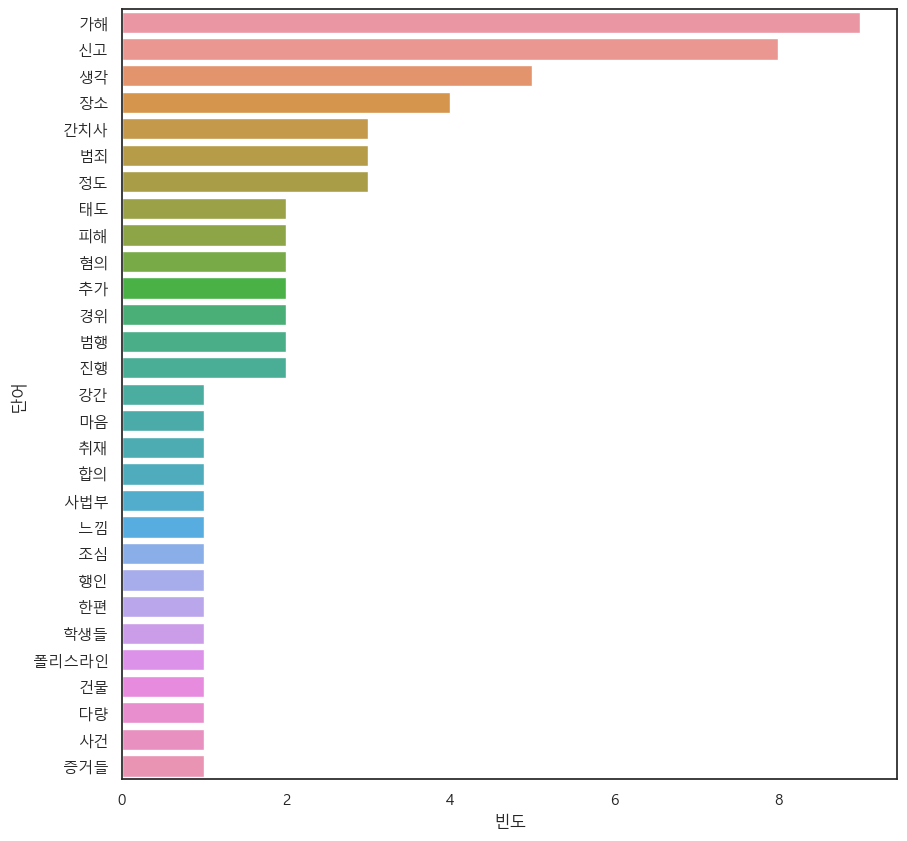

In [30]:
sns.barplot(data = vio_df, x = '빈도', y = '단어')

## 제목 분석 with Bigram

In [31]:
title = bkp.keywords_list(news_df['제목'])

In [32]:
bot = []
for i in range(len(title)):
    word = okt.nouns(title[i])
    bot.append(word)

In [33]:
wors = []

for sentence in bot:
    bigram = bigrams(sentence)
    for t in bigram:
        if t[0]== '인하대':
            wors.append(t[1])
        elif t[1] == '인하대':
            wors.append(t[0])

In [34]:
counter = {}

for word in wors:
    if not word in counter:
        counter[word] = 1
    if word in counter:
        counter[word] +=1
        
title_df = bkp.counter_to_DataFrame(counter)
title_df = title_df[title_df['단어'].str.len() >= 2].reset_index(drop = True).head(30)

<AxesSubplot: xlabel='빈도', ylabel='단어'>

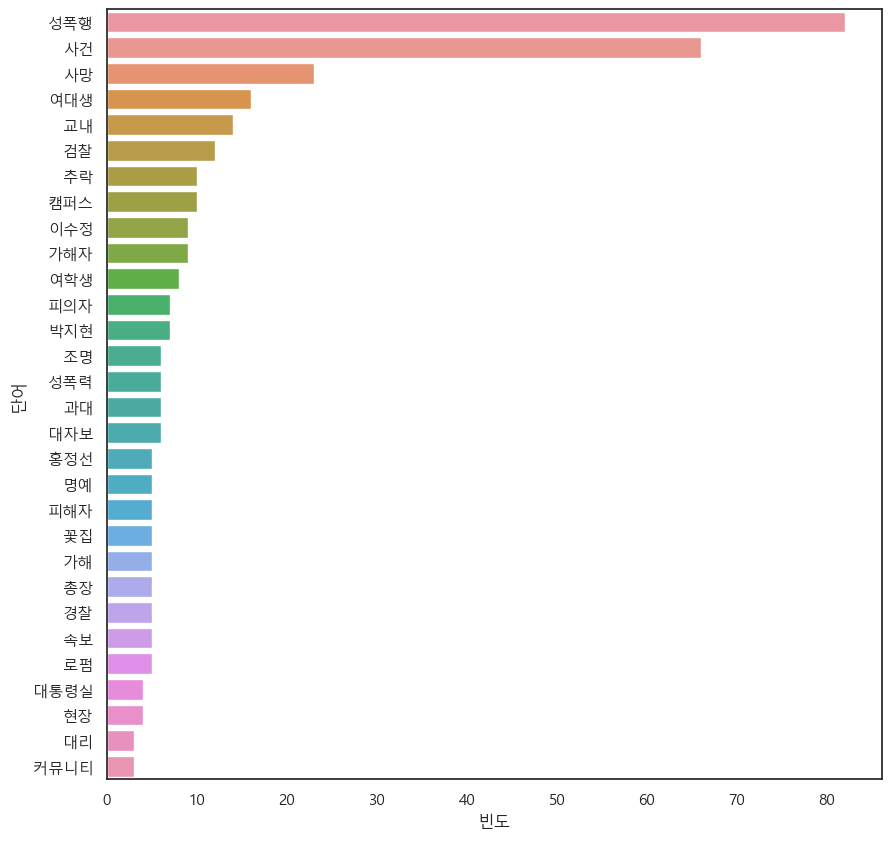

In [35]:
sns.barplot(data = title_df, x = '빈도', y = '단어')

## 특정 단어 사용 고빈도 언론사 추출

In [36]:
news_df[news_df['제목'].str.contains('여대생')].groupby('언론사').size()

언론사
경향신문    1
동아일보    5
문화일보    1
서울신문    6
세계일보    8
조선일보    3
중앙일보    8
dtype: int64

In [37]:
news_df[news_df['본문'].str.contains('여대생')].groupby('언론사').size()

언론사
경향신문     2
국민일보     2
동아일보     8
문화일보     5
서울신문     6
세계일보    16
조선일보     5
중앙일보     5
한겨레      2
dtype: int64

In [38]:
news_df[news_df['제목'].str.contains('강간')].groupby('언론사').size()

언론사
경향신문    2
국민일보    5
동아일보    3
문화일보    1
서울신문    5
세계일보    1
조선일보    6
중앙일보    3
한겨레     1
dtype: int64

## t-SNE

In [39]:
text = news_df['키워드']

In [40]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
])        
vec = pipeline.fit_transform(text).todense()

In [41]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, learning_rate=400).fit_transform(vec)

tsne_df = pd.DataFrame(tsne, columns = ['component 0', 'component 1'])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


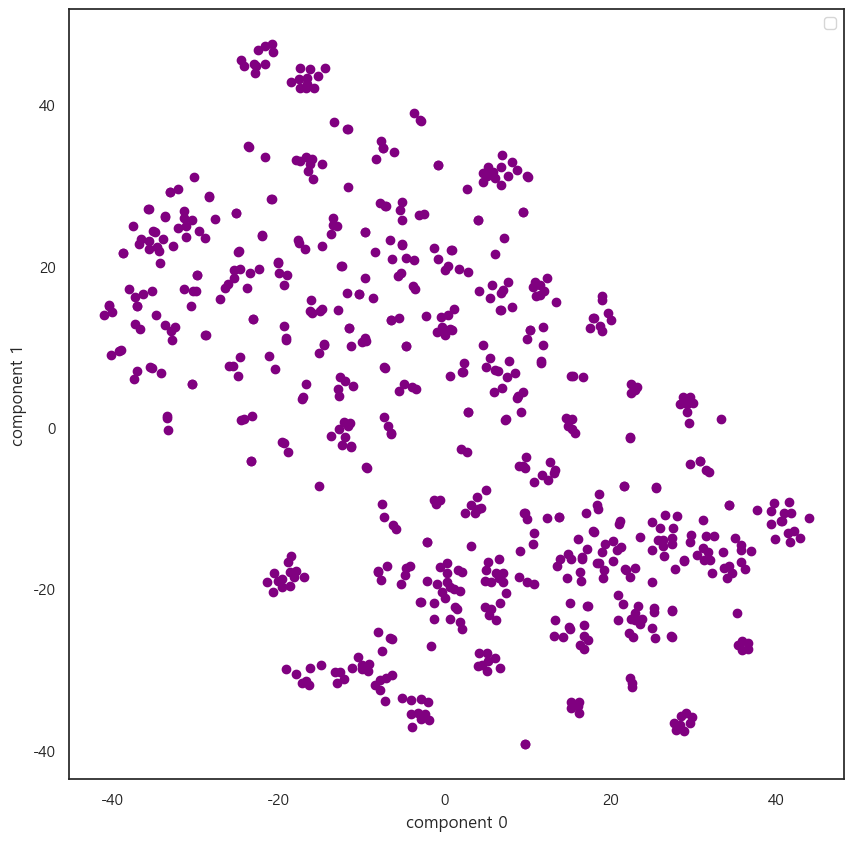

In [42]:
plt.scatter(tsne_df['component 0'], tsne_df['component 1'], color = 'purple')

plt.xlabel('component 0')
plt.ylabel('component 1')
plt.legend()
plt.show()

문서 간 밀접 여부 파악이 어려움

Clustering의 정확도가 낮을 것으로 예상

# Topic Modeling

In [3]:
news_words = bkp.keyword_parser(news_df['키워드'])

In [4]:
import gensim
news_dict = gensim.corpora.Dictionary(news_words)
corpus = [news_dict.doc2bow(text) for text in news_words]

In [45]:
coherence = []
for i in range(2,20):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = i, id2word=news_dict)
    coherence_mo_lda = gensim.models.CoherenceModel(model = ldamodel, texts = news_words, dictionary = news_dict) 
    coherence_lda = coherence_mo_lda.get_coherence()
    coherence.append(coherence_lda)

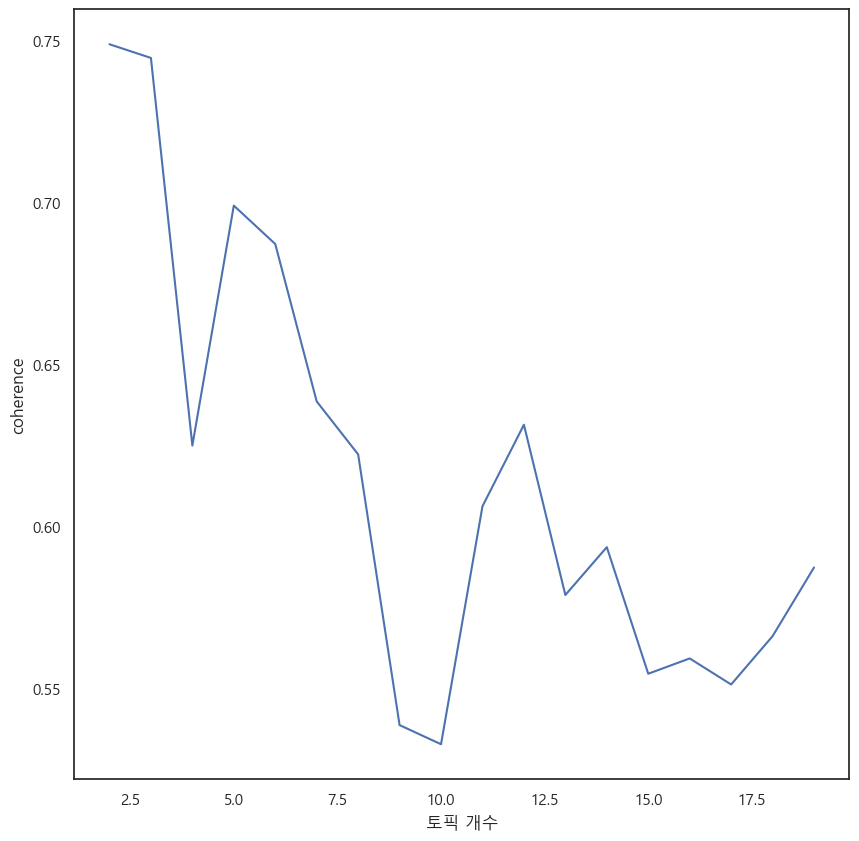

In [46]:
x = range(2,20)
plt.plot(x,coherence)
plt.xlabel("토픽 개수")
plt.ylabel("coherence")
plt.show()

최적 Topic이 1개로 나옴

즉 거의 모든 문서의 내용이 상당히 일치함을 의미

다만, 주제 분석을 위해 두 번째로 가장 높은 2개를 토픽 개수로 설정하여 LDA 진행

In [5]:
NUM_TOPICS = 2
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=news_dict, passes=20, iterations=100, random_state=100)
topics = ldamodel.print_topics(num_words=5)
for topic in topics:
    print(topic)

(0, '0.022*"인하대" + 0.020*"A씨" + 0.018*"경찰" + 0.016*"사건" + 0.016*"혐의"')
(1, '0.006*"정부" + 0.005*"교수" + 0.004*"인하대" + 0.004*"중국" + 0.003*"지원"')


In [6]:
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(ldamodel, corpus, news_dict)
pyLDAvis.display(vis)

c:\Users\cjsso\AppData\Local\R-MINI~1\envs\vspy\lib\site-packages\past\builtins\misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


In [7]:
pyLDAvis.save_html(vis, 'inha_LDA.html') #LDAvis save

In [8]:
def make_topictable(ldamodel, corpus):
    topic_table = pd.DataFrame()

    for i, topic_list in enumerate(ldamodel[corpus]):
        doc = topic_list[0] if ldamodel.per_word_topics else topic_list            
        doc = sorted(doc, key=lambda x: (x[1]), reverse=True)

        for j, (topic_num, prop_topic) in enumerate(doc):
            if j == 0: 
                topic_table = topic_table.append(pd.Series([int(topic_num), round(prop_topic,4), topic_list]), ignore_index=True)
            else:
                break
    return(topic_table)

In [9]:
topictable = make_topictable(ldamodel, corpus)
topictable = topictable.reset_index() 

In [10]:
topictable.columns = ['뉴스 번호', '주요 토픽', '주요 토픽 비중', '토픽 별 비중']
topictable.head(20)

,뉴스 번호,주요 토픽,주요 토픽 비중,토픽 별 비중
0,0,1,0.9954,"[(1, 0.99537206)]"
1,1,1,0.9963,"[(1, 0.9962849)]"
2,2,1,0.9981,"[(1, 0.99811554)]"
3,3,1,0.9978,"[(1, 0.9977649)]"
4,4,0,0.5868,"[(0, 0.5868141), (1, 0.41318586)]"
5,5,1,0.9983,"[(1, 0.9982635)]"
6,6,1,0.9957,"[(1, 0.9956665)]"
7,7,1,0.5056,"[(0, 0.49437848), (1, 0.50562155)]"
8,8,1,0.9958,"[(1, 0.99577546)]"
9,9,1,0.9963,"[(1, 0.99634767)]"


In [11]:
news_topic_df = pd.concat([news_df[['제목', '언론사', '키워드']],topictable['주요 토픽']], axis = 1)

In [12]:
news_topic_df[news_topic_df['주요 토픽'] == 0].head(30) #인하대 사건 관련 기사가 다수

,제목,언론사,키워드,주요 토픽
4,"울산, 동남권 미세먼지 연구 관리 ‘선도’",서울신문,"울산,동남,미세,먼지,관리,선도,UNIST,동남,미세,먼지,관리센터,유치,2025년...",0
10,인하대 ‘성폭행 강간치사’ 가해 남학생 퇴학 의결,세계일보,"강간치사,인하대,성폭행,강간,치사,의결,남학생,퇴학,인하대,캠퍼스,동급생,성폭행,건...",0
12,‘인하대 성폭행 추락사’ 가해 남학생 퇴학 처분 의결,문화일보,"추락사,인하대,성폭행,남학생,퇴학,처분,의결,인하대,캠퍼스,또래,여학생,성폭행,혐의...",0
13,‘인하대 성폭행 추락사’ 가해 학생 퇴학 처분 의결,경향신문,"추락사,인하대,성폭행,학생,퇴학,처분,의결,인하대학교,캠퍼스,발생,사건,성폭행,사망...",0
14,‘성폭행 추락사’ 인하대생 퇴학 의결 다시 주목받는 그 목소리,동아일보,"성폭행,추락사,의결,인하대,퇴학,주목,목소리,인하대학교,캠퍼스,여대생,성폭행,살해,...",0
15,인하대 성폭행 사망 가해자 ‘퇴학’ 의결 총장 결정만 남았다,한겨레,"퇴학,인하대,성폭행,사망,가해자,의결,총장,결정,사망사건,인하대,성폭행,사망,사건,...",0
17,'인하대 성폭행 추락사' 첫 재판 비공개로 전환,세계일보,"추락사,인하대,성폭행,재판,전환,인하대학교,성폭행,사망,사건,가해,남학생,재판,비공...",0
18,"인하대, ‘성폭행 추락사’ 가해 학생 퇴학 처분 의결",서울신문,"인하대,성폭행,추락사,학생,퇴학,처분,의결,인하대,캠퍼스,여학생,성폭행,건물,추락,...",0
19,"인하대, 성폭행 가해 학생 '퇴학' 처분 의결",한국일보,"인하대,성폭행,가해,학생,퇴학,처분,의결,확정,퇴학,처분,확정,불가,인하대,캠퍼스,...",0
20,‘인하대 성폭행 추락사’ 재판 비공개로 유족 의견 반영,중앙일보,"추락사,인하대,성폭행,재판,유족,의견,반영,인하대,캠퍼스,또래,여학생,성폭행,건물,...",0


In [13]:
news_topic_df[news_topic_df['주요 토픽'] == 1].head(20) #인하대 사건과 관련 없는 기사

,제목,언론사,키워드,주요 토픽
0,“자산운용 전문인력 양성” 인하대⋅한화저축은행 업무 협약,조선일보,"양성,자산,운용,전문,인력,인하대,한화저축은행,업무,협약,인하대,한화저축은행,양성,...",1
1,"인하대 한화저축은행, 자산운용 인력 양성 위해 맞손",국민일보,"인하대,한화저축은행,양성,자산,운용,인력,맞손,인하대학교,이사장실,본관,한화저축은행...",1
2,"흔들리는 '10월 물가 정점론' 농산물, 라면 과자에 환율까지 출렁",중앙일보,"정점론,물가,정점,농산물,과자,환율,출렁,정부,그간,강조,정점론,물가,정점,예년,추...",1
3,정원감축 ‘당근’ 외면한 주요대 줄어드는 인원 88% 비수도권,한겨레,"정원,감축,당근,외면,주요대,비수도권,인원,88%,비수,도권,96곳,전국,대학,학령...",1
5,"""부자감세+재정건전성 강화 → 양극화 촉발""",내일신문,"부자감세,재정건전성,강화,양극,촉발,정부,세제개편안,평가,부자감세,재정,건전,강화,...",1
6,"“상추 추가, 네? 1500원요?” 길어지는 인플레에 ‘공짜’가 사라진다",조선일보,"상추,추가,1500원,인플레,공짜,WEEKLY,BIZ,Biz,Pick,직장인,지난달...",1
7,"울산시 유니스트, 동남권 미세먼지 연구 관리 선도",경향신문,"울산시,유니스트,동남,미세,먼지,관리,선도,울산시,유니스트,울산과학기술원,협력,동남...",1
8,"인천시, 미래 교통수단 파브(PAV) 조기 상용화 나서",문화일보,"인천시,파브,미래,교통수단,PAV,조기,상용,5년,투입,평가,핵심,부품,시험,복합,...",1
9,"인천시, 미래 항공교통산업 거점으로 도약",동아일보,"인천시,거점,미래,항공,교통,산업,도약,종합테스트,베드,구축,공모,선정,구성,산학연...",1
11,우회 추진 논란 ‘지방시대위원회’ 강행,세계일보,"우회,추진,논란,지방,시대,위원회,강행,윤석열정부,지방시대위원회,출범,특별법,입법,...",1


In [58]:
news_topic_df.to_excel("./inha_topic.xlsx")